In [22]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")


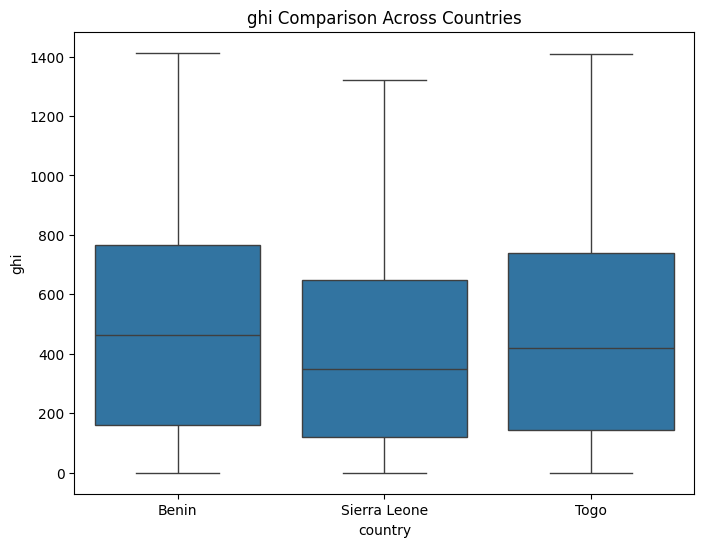

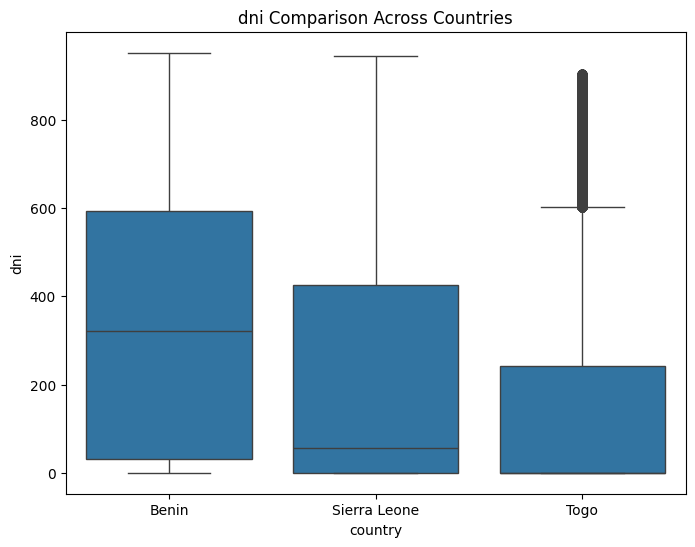

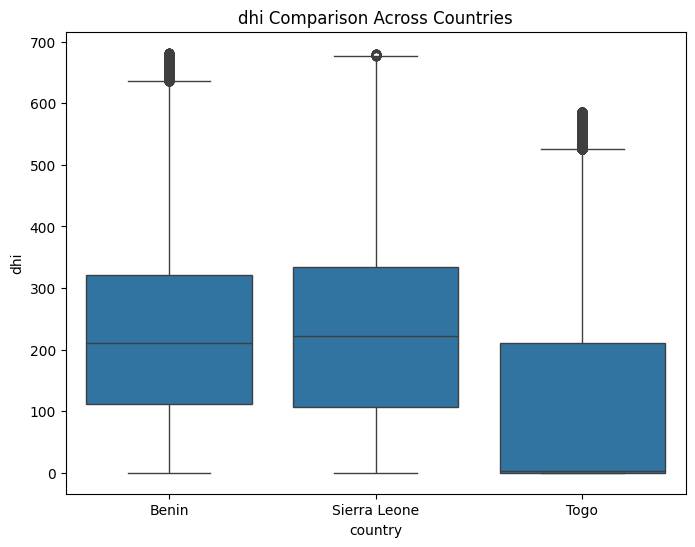

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


benin['country'] = 'Benin'
sierra_leone['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

metrics = ['ghi', 'dni', 'dhi']  

for metric in metrics:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='country', y=metric, data=df_all)
    plt.title(f'{metric} Comparison Across Countries')
    plt.show()


In [24]:
summary = df_all.groupby('country')[metrics].agg(['mean','median','std'])
summary


ghi                            dni                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         468.365569  462.7  323.861145  338.850513  321.3  283.459590   
Sierra Leone  397.998128  350.5  306.747919  212.271546   56.6  258.253864   
Togo          445.505829  418.7  322.018781  149.368966    0.0  248.554496   

                     dhi                     
                    mean median         std  
country                                      
Benin         226.554585  209.9  151.818395  
Sierra Leone  227.895183  221.3  149.820612  
Togo          112.408673    2.5  151.292938

In [25]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    benin['ghi'].dropna(),
    sierra_leone['ghi'].dropna(),
    togo['ghi'].dropna()
)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 3453.79, p-value: 0.0000


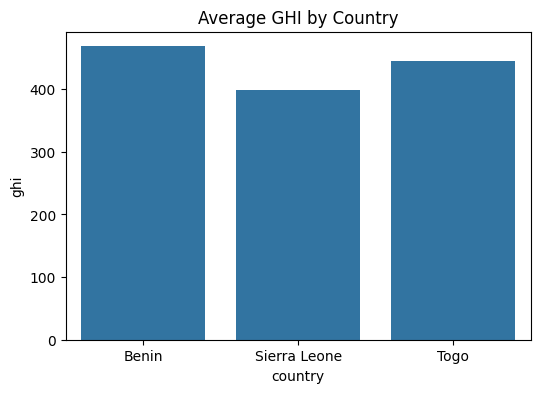

In [26]:
avg_ghi = df_all.groupby('country')['ghi'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='country', y='ghi', data=avg_ghi)
plt.title("Average GHI by Country")
plt.show()


### Key Observations

Togo shows the highest average and median GHI, indicating the strongest overall solar potential among the three countries.  
Benin has moderate GHI values but shows less variability, suggesting more stable solar conditions over time.  
Sierra Leone records the lowest GHI and highest DHI, implying more diffuse sunlight and possibly cloudier conditions compared to Benin and Togo.  

Overall, the ANOVA test confirmed statistically significant differences in GHI values (p < 0.05), showing that location plays an important role in solar potential variation.
